In [3]:
# [1] Configurações iniciais

import fastf1
import fastf1.plotting
import numpy as np
import matplotlib.pyplot as plt

race = fastf1.get_session(2021, 'Brazil', 'R')
race.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '16', '55', '10', '31', '14', '4', '5', 

In [4]:
# [2] Determinar piloto a ser analisado

piloto = "HAM"
laps = race.laps.pick_drivers(piloto)

# Filtra apenas voltas com pit stops
pit_stops = laps[laps['PitInTime'].notna()]
print(pit_stops[['LapNumber', 'PitInTime']])

    LapNumber              PitInTime
6         7.0 0 days 01:11:37.672000
7         8.0 0 days 01:13:49.545000
25       26.0 0 days 01:38:27.522000
42       43.0 0 days 01:59:53.355000


In [6]:
# [3] Calcula a média de tempo de volta antes e depois dos pit stops

tempo_volta_antes = laps[laps['LapNumber'] < pit_stops.iloc[0]['LapNumber']]['LapTime'].mean()
tempo_volta_depois = laps[laps['LapNumber'] > pit_stops.iloc[0]['LapNumber']]['LapTime'].mean()

print(f"Tempo médio antes do pit stop: {tempo_volta_antes}")
print(f"Tempo médio depois do pit stop: {tempo_volta_depois}")

Tempo médio antes do pit stop: 0 days 00:01:18.184666666
Tempo médio depois do pit stop: 0 days 00:01:17.408218750


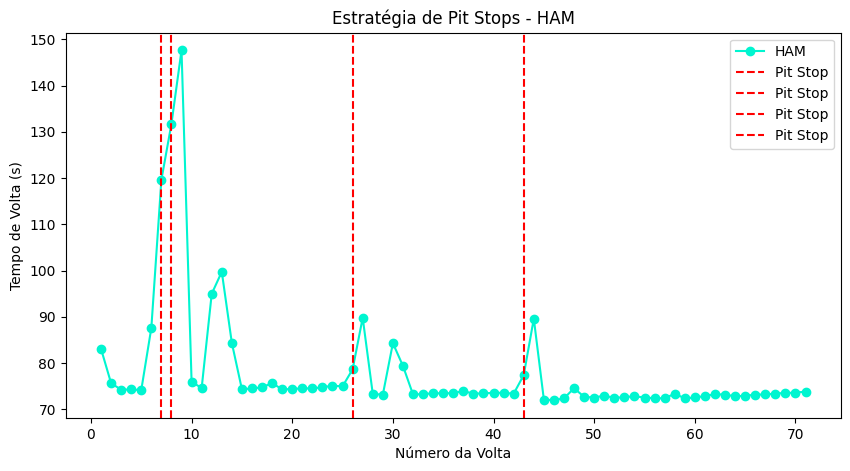

In [11]:
# [4] Visualização da estratégia
plt.figure(figsize=(10, 5))
color = fastf1.plotting.get_team_color('Mercedes', race)

# Plota os tempos de volta
plt.plot(laps['LapNumber'], laps['LapTime'].dt.total_seconds(), color=color, label=piloto, marker='o')

# Destaca pit stops
for _, pit in pit_stops.iterrows():
    plt.axvline(x=pit['LapNumber'], color='r', linestyle='--', label='Pit Stop')

plt.xlabel("Número da Volta")
plt.ylabel("Tempo de Volta (s)")
plt.title(f"Estratégia de Pit Stops - {piloto}")
plt.legend()
plt.savefig("pit_stop_ham.png")
plt.show()
